In [438]:
# kaggle titanic
# データ分割の検証
# 敬称の抽出・特徴量への追加
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
import xgboost as xgb
import warnings
# warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

In [439]:
# dataset
DATA_DIR = './data/'
TRAIN_DATA = 'train.csv'
TEST_DATA = 'test.csv'
SUBMIT_DATA = 'gender_submission.csv'

In [440]:
# load train data
RAW_DATA = pd.read_csv(os.path.join(DATA_DIR, TRAIN_DATA))

data_test = pd.read_csv(os.path.join(DATA_DIR, TEST_DATA)) 

data = RAW_DATA

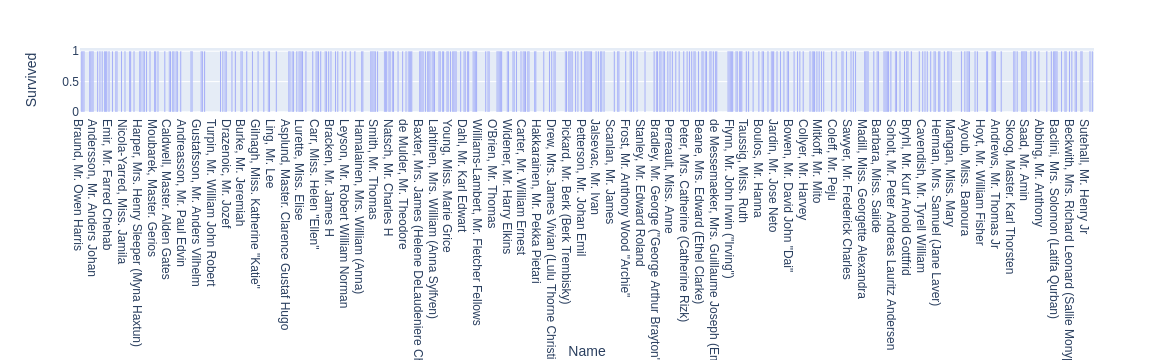

In [441]:
# 名前による分析
# plot
px.bar(data, x="Name", y="Survived")

In [442]:
#敬称(Honorific Title)の抽出
Title = data[["Survived", "Name"]]
Title["HonorificTitle"] = data["Name"].map(lambda x: x.split(', ')[1].split('. ')[0])

# 敬称の内容
Title["HonorificTitle"].value_counts()

# 少ない敬称はその他
Title["HonorificTitle"] = Title["HonorificTitle"].replace(["Dr", "Rev", "Major", "Col", "Mlle", "Jonkheer", "Ms", "Capt", "Mme", "Sir", "Don", "Lady", "the Countess"], "Others")
Title["HonorificTitle"].value_counts()

# 敬称別の生存率
Title["Survived"].groupby(Title["HonorificTitle"]).agg(["mean", "count"])

# 敬称毎に数字の割当
Title['HonorificTitle'] = Title['HonorificTitle'].map( {"Master": 0 , "Miss":1 , "Mr":2, "Mrs":3, "Others":4})
# Title.head()

# 敬称をHonorificTitleとして、データ・セットに追加
data['HonorificTitle'] = Title['HonorificTitle']

In [443]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HonorificTitle
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,4
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,2


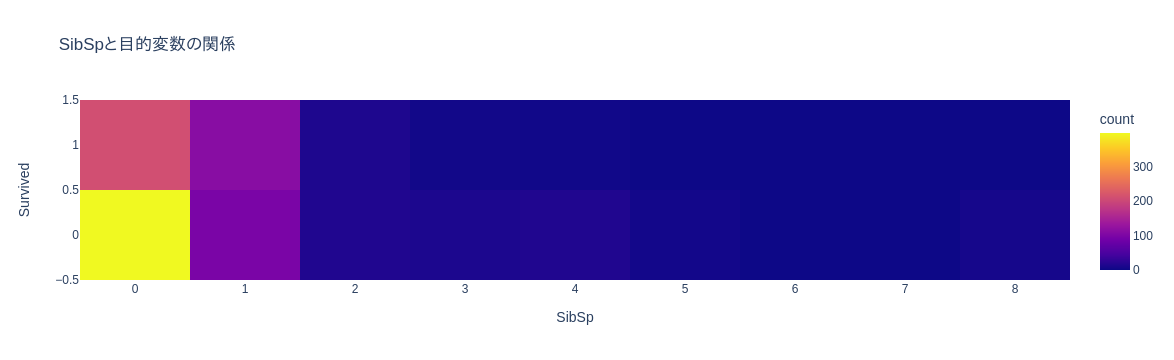

In [444]:
# plot sibspとSurvivedの関係
px.density_heatmap(data, y="Survived", x="SibSp" ,title="SibSpと目的変数の関係")

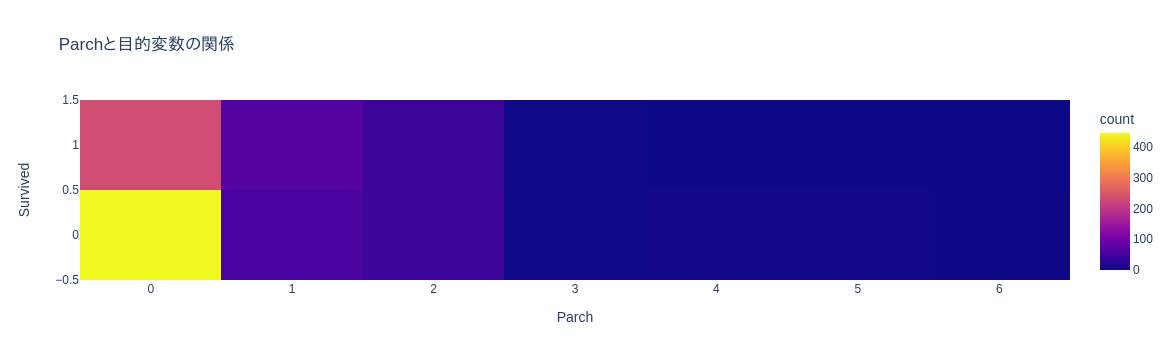

In [445]:
# 目的変数とParchの関係
px.density_heatmap(data, y="Survived", x="Parch", title="Parchと目的変数の関係")

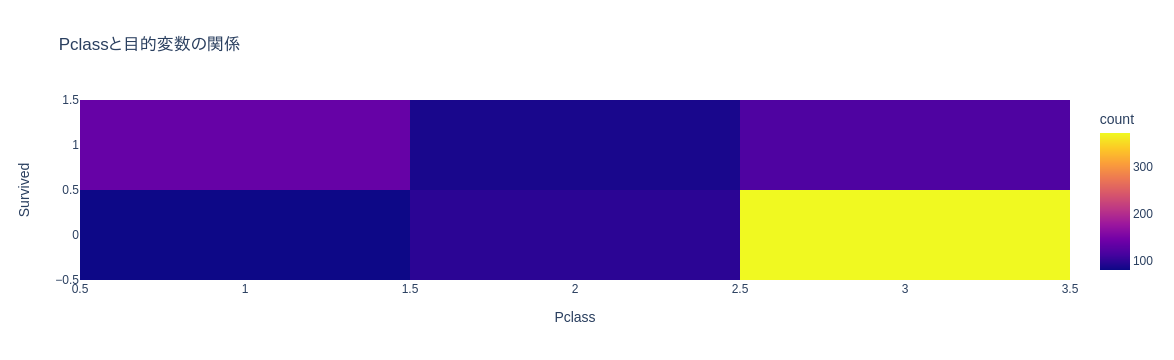

In [446]:
# 目的変数とPclassの関係
px.density_heatmap(data, y="Survived", x="Pclass", title="Pclassと目的変数の関係")

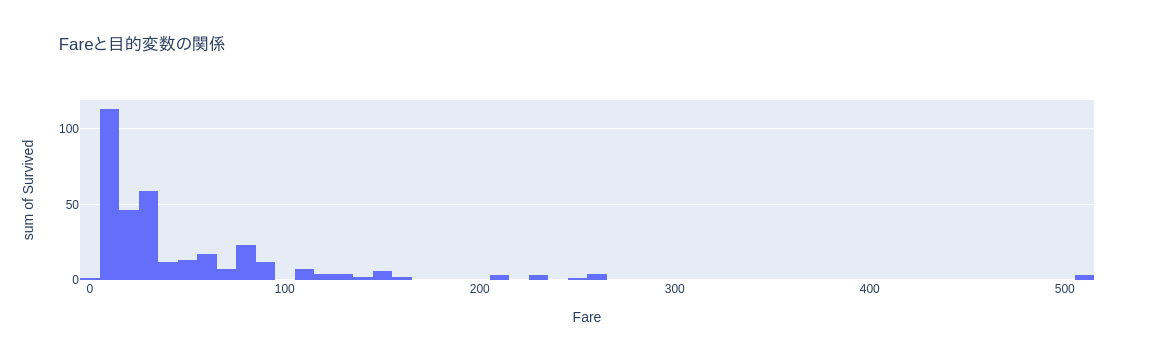

In [447]:
# 目的変数とFareの関係
px.histogram(data, y="Survived", x="Fare", title="Fareと目的変数の関係")

In [448]:
# 家族の人数を特徴量として、新たにつくる
# Parch（同乗した親と子）とSibSp（同乗した兄弟姉妹と配偶者）、本人を加算する
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1

In [449]:
# 予測用ファイルにも追加
data_test['FamilySize'] = data_test['Parch'] + data_test['SibSp'] + 1

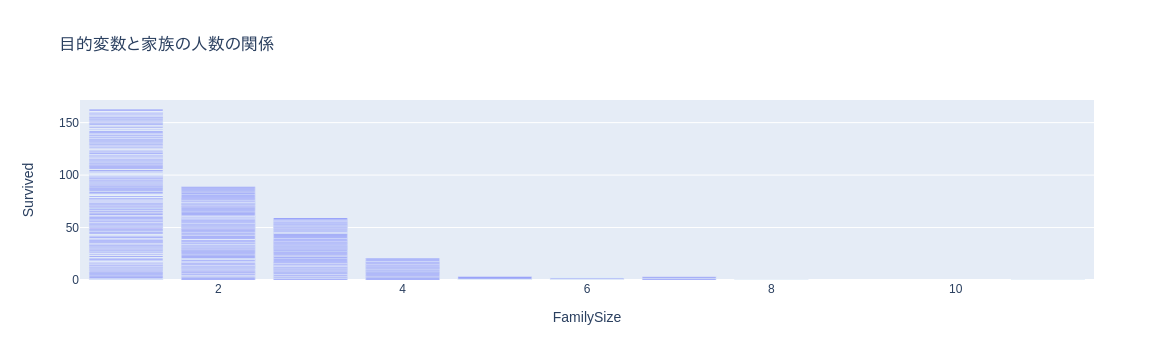

In [450]:
# plot
# 目的変数と家族の関係
px.bar(data, y="Survived", x="FamilySize", title="目的変数と家族の人数の関係")

In [451]:
# 単身の乗客を特徴量として、追加
data['IsSingle'] = 0
data.loc[data['FamilySize'] == 1, 'IsSingle'] = 1

# 予測用ファイルにも追加
data_test['IsSingle'] = 0
data_test.loc[data_test['FamilySize'] == 1, 'IsSingle'] = 1

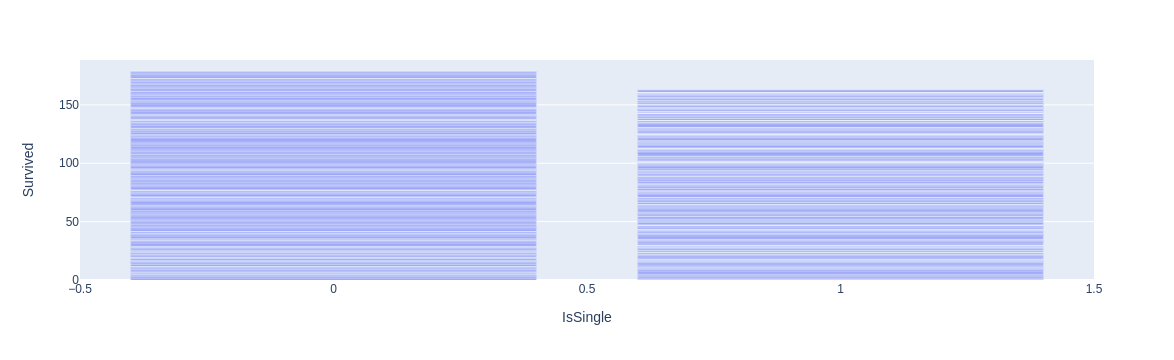

In [452]:
# plot
# 目的変数と単身の乗客の関係
px.bar(data, y="Survived", x="IsSingle")

In [453]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HonorificTitle,FamilySize,IsSingle
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,1,1


In [454]:
# 欠損値処理、ダミー変数化
data['Fare'] = data['Fare'].fillna(np.mean(data['Fare']), inplace=True)

data.isnull().sum()

# Objective variable and Explanatory variable
y_1 = data['Survived']
# X_1 = data.drop(columns={'Survived', 'Name', 'Ticket', 'Embarked', 'Cabin'})

# IsSingle（単身者）とFamilySize（家族の人数）を追加した為、SibSpとParchは削除
# X_1 = data.drop(columns={'Survived', 'Name', 'Ticket', 'Cabin'})
X_1 = data.drop(columns={'Survived', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'})
# X_1 = data.drop(columns={'Survived', 'Ticket', 'Cabin'})
# from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_1_le = X_1
Sex_le = le.fit_transform(X_1_le['Sex'])
X_1['Sex'] = Sex_le
embarked_le = le.fit_transform(X_1_le['Embarked'].values)
X_1['Embarked'] = embarked_le
# name_le = le.fit_transform(X_1_le['Name'].values)
# X_1['Name'] = name_le
X_1 = X_1.fillna(0)

In [455]:
#予測用ファイルの敬称(Honorific Title)の抽出
Title_test = data_test[["Name"]]
Title_test["HonorificTitle"] = data_test["Name"].map(lambda x: x.split(', ')[1].split('. ')[0])

# 敬称の内容
Title_test["HonorificTitle"].value_counts()

# 少ない敬称はその他
Title_test["HonorificTitle"] = Title_test["HonorificTitle"].replace(["Dr", "Rev", "Major", "Col", "Mlle", "Jonkheer", "Ms", "Capt", "Mme", "Sir", "Don", "Lady", "the Countess"], "Others")
Title_test["HonorificTitle"].value_counts()

# 敬称毎に数字の割当
Title_test['HonorificTitle'] = Title_test['HonorificTitle'].map( {"Master": 0 , "Miss":1 , "Mr":2, "Mrs":3, "Others":4})
# Title.head()

# 敬称をHonorificTitleとして、データ・セットに追加
data_test['HonorificTitle'] = Title_test['HonorificTitle']

In [456]:
# 予測用ファイルの欠損値処理
data_test['Fare'] = data_test['Fare'].fillna(np.mean(data_test['Fare']), inplace=True)

# Objective variable and Explanatory variable
# y_1 = data['Survived']

# data_test = data_test.drop(columns={'Name', 'Ticket', 'Cabin'})
# IsSingle（単身者）とFamilySize（家族の人数）を追加した為、SibSpとParchは削除
data_test = data_test.drop(columns={'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'})

# data_test = data_test.drop(columns={'Ticket', 'Cabin'})
data_test_le = data_test

data_test_sex_le = le.fit_transform(data_test_le['Sex'])
data_test_le['Sex'] = data_test_sex_le

data_test_embarked_le = le.fit_transform(data_test_le['Embarked'])
data_test_le['Embarked'] = data_test_embarked_le

# data_test_name_le = le.fit_transform(data_test_le['Name'])
# data_test_le['Name'] = data_test_name_le

data_test_le = data_test_le.fillna(0)
data_predict = data_test_le

In [457]:
# X_train1, X_test1, y_train, y_test = train_test_split(X_1, y_1, random_state=0, test_size=0.3, stratify=y_1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, random_state=0, test_size=0.33, stratify=y_1)

In [458]:
X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

((596, 9), (596,), (295, 9), (295,))

In [459]:
'''
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
'''

"\nestimators = [\n    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),\n    ('svr', make_pipeline(StandardScaler(),\n                          LinearSVC(random_state=42)))\n]\nclf = StackingClassifier(\n    estimators=estimators, final_estimator=LogisticRegression()\n)\n"

In [460]:
# GridSearchCV
# パラメータを dict 型で指定
param_grid = {"eta": [0.3, 0.5, 0.7], "colsample_bytree":[0.5, 0.8], "subsample": [0.2, 0.7], "lambda": [0, 1],
             "learning_rate":[0.05, 0.1, 0.3, 0.5]}

# validation set は GridSearchCV が自動で作成してくれるため，
# training set と test set の分割のみを実行すればよい
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train1, y_train1, random_state=0)

grid_search = GridSearchCV(xgb.XGBRFClassifier(), param_grid, cv=5)

# fit 関数を呼ぶことで交差検証とグリッドサーチがどちらも実行される
grid_search.fit(X_train2, y_train2)

print('Test set score: {}'.format(grid_search.score(X_test2, y_test2)))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best cross-validation: {}'.format(grid_search.best_score_))

[19:39:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:39:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:39:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:39:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [485]:
# '''

# param_grid = {"eta": [0.3, 0.5, 0.7], "colsample_bytree":[0.5, 0.8], "subsample": [0.2, 0.7], "lambda": [0, 1],
#             "learning_rate":[0.05, 0.1, 0.3, 0.5]}

estimators = [
    ('rf01', RandomForestClassifier(random_state=0)),
    ('gbt01', GradientBoostingClassifier(random_state=0)),
    # ('bc01', BaggingClassifier(random_state=0)),
    ('mlp01', MLPClassifier(random_state=0)),
    # ('nbrs01', KNeighborsClassifier()),
    ('etrc01', ExtraTreesClassifier(random_state=0)),
    ('etrc02', ExtraTreesClassifier(random_state=0, class_weight='balanced')),
    ('xgb01', xgb.XGBClassifier(random_state=0, objective="binary:logistic", eval_metric='auc', n_estimators=50, learning_rate=0.03)),
    ('xgb02', xgb.XGBClassifier(random_state=0, objective="binary:logistic", eval_metric='auc', n_estimators=150, learning_rate=0.05)),
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=xgb.XGBClassifier(random_state=0, objective="binary:logistic", eval_metric='auc', eta=0.3, learning_rate=0.05,
                                                            colsample_bytree=0.5, subsample=0.7)
)
# '''

In [486]:
# 学習
clf.fit(X_train2, y_train2).score(X_test2, y_test2)

0.8322147651006712

In [366]:
# 予測
pred_stacked01 = clf.predict(data_predict)

In [350]:
# 交差検証
from sklearn.model_selection import cross_val_score

# xgbの分析結果比較
scores_01 = cross_val_score(clf ,X_train2, y_train2)
print('Cross-Validation scores: {}'.format(scores_01))

# スコアの平均値
import numpy as np
print('Average score: {}'.format(np.mean(scores_01)))

Cross-Validation scores: [0.8        0.8        0.83146067 0.79775281 0.78651685]
Average score: 0.8031460674157304


In [351]:
# 提出用ファイル読み込み
data_submit = pd.read_csv(os.path.join(DATA_DIR, SUBMIT_DATA))

In [352]:
# 提出用ファイルに予測結果を連結
# GrideSearchの結果を使った、モデリング結果を提出用ファイルに連結
data_submit['Survived'] = pred_stacked01

In [353]:
# write csv
data_submit.to_csv(os.path.join(DATA_DIR, 'submission_xgb20.csv'), index=False)

In [384]:
xgb.XGBClassifier?

Init signature:
xgb.XGBClassifier(
    *,
    objective='binary:logistic',
    use_label_encoder=True,
    **kwargs,
)
Docstring:     
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.
    use_label_encoder : bool
        (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new
        code, we recommend that you set this parameter to False.

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: string
        Specify which booster to use: gbtree, gblinear or dart.
    tree_method: string
        Spec